In [1]:
import pandas as pd
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [15]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [3]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [4]:
DF.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [9]:


print('상환율 : ', DF.default =='No'].value_counts()/len(DF.default))
print('상환율 : ', DF.default['Yes'].value_counts()/len(DF.default))

상환율 :  default  student  balance      income      
No       Yes      2388.174009  7832.135644     0.0001
         No       700.453137   54661.115070    0.0001
                  699.842024   41985.257670    0.0001
                  699.762559   32881.304510    0.0001
                  699.680386   50267.849870    0.0001
                                                ...  
                  1462.694930  50508.746440    0.0001
                  1462.223173  29574.234570    0.0001
                  1461.887463  38559.073480    0.0001
                  1459.561402  44334.616970    0.0001
                  0.000000     10593.921250    0.0001
Length: 9667, dtype: float64


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


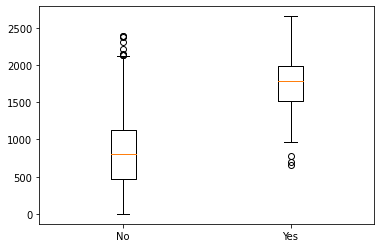

CPU times: user 112 ms, sys: 1.73 ms, total: 114 ms
Wall time: 117 ms


In [30]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot([DF[DF.default =='No'].balance,
            DF[DF.default == 'Yes'].balance],
            labels= ['No','Yes'])
plt.show()

In [28]:
X =DF[['balance']]
y = DF['default']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       [-0.6328925 ],
       [-0.10279088]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_hat = Model.predict(X_test)
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

confusion_matrix(y_test, y_hat, labels=['Yes','No'])

array([[  32,   72],
       [   8, 2888]])

In [41]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label='Yes'))
print(recall_score(y_test, y_hat, pos_label='Yes'))

0.9733333333333334
0.8
0.3076923076923077


In [47]:
print(f1_score(y_test, y_hat, pos_label='Yes'))

0.4444444444444444


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat,
                            target_names=['No','Yes'],
                            digits=5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000

